In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #For getting the heatmap

In [80]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Initital Processing

In [82]:
df[['diagnosis',]].groupby('diagnosis').count()
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [85]:
df = df.drop(df[['Unnamed: 32', 'id']],axis =1) #dropping the unnamed bad column
df[['diagnosis']] = df[['diagnosis']].replace(['M'], '1').replace(['B'], '0') #replacing Malignant with 1s and Benign with 0s

KeyError: "None of [Index(['Unnamed: 32', 'id'], dtype='object')] are in the [columns]"

# Splitting the Data 

In [77]:
train = df.sample(frac = 0.75, random_state= 200)
test = df.drop(train.index)
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
225,0,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.046030,0.2075,...,16.77,16.90,110.40,873.2,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072
385,1,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.052710,0.1627,...,15.79,31.71,102.20,758.2,0.13120,0.15810,0.26750,0.13590,0.2477,0.06836
338,0,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.017750,0.1890,...,11.16,26.84,71.98,384.0,0.14020,0.14020,0.10550,0.06499,0.2894,0.07664
458,0,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.017620,0.1667,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
495,0,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,...,16.01,28.48,103.90,783.6,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,1,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.141000,0.1797,...,30.67,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738
284,0,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,0.1432,...,13.90,19.69,92.12,595.6,0.09926,0.23170,0.33440,0.10170,0.1999,0.07127
546,0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,...,11.25,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
482,0,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.052660,0.1779,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326


<AxesSubplot:>

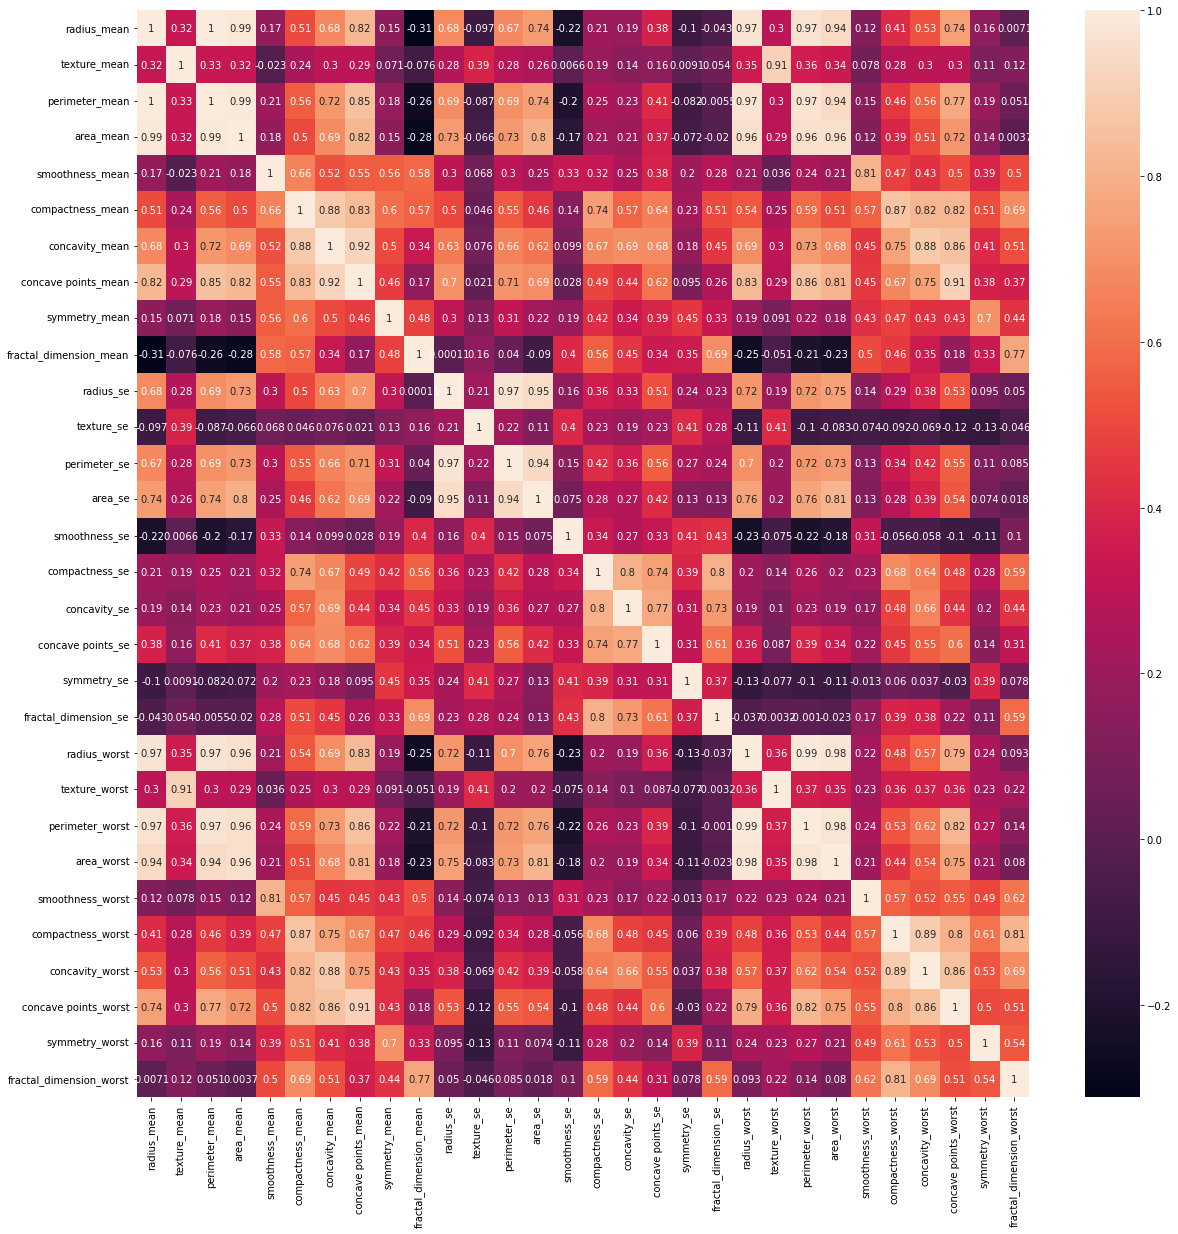

In [78]:
corel_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corel_matrix, annot = True)